
# <span style="color:rgb(213,80,0)">Plantilla examen de robótica</span>

Torbellín Sanchez Mauricio Dariel


Primer Examen Parcial

## Modelado Completo de un Robot SCARA: Del Análisis Cinemático al Control Dinámico
## Introduccion

La automatización industrial moderna depende de arquitecturas robóticas que combinan velocidad, precisión y repetibilidad. Entre ellas, el robot SCARA (Selective Compliance Assembly Robot Arm) se ha consolidado como un estándar en aplicaciones de ensamble, pick\-and\-place y manufactura de precisión, gracias a su rigidez vertical y su flexibilidad en el plano horizontal.


El presente reporte documenta el desarrollo integral del modelado matemático de un robot SCARA, abordando de manera sistemática los niveles cinemático y dinámico mediante el formalismo de Euler\-Lagrange. Este enfoque permite comprender y predecir con precisión el comportamiento mecánico del sistema, lo cual resulta esencial para el diseño de controladores avanzados, la simulación dinámica de alta fidelidad y la optimización de trayectorias en entornos industriales.


Objetivo Central


El objetivo principal de este trabajo es construir un modelo matemático completo y verificable del robot SCARA que permita:

-  Describir y predecir la postura del efector final mediante la cinemática directa e inversa.
-  Relacionar las velocidades articulares con las del efector final a través del Jacobiano.
-  Modelar las aceleraciones del sistema a partir de la derivada temporal del Jacobiano.
-  Derivar las ecuaciones dinámicas completas empleando el formalismo Euler\-Lagrange.
-  Implementar tanto el modelo dinámico directo como el modelo inverso para análisis y control.

Metodología y Enfoque


El desarrollo se organiza en un flujo progresivo que garantiza la consistencia matemática y la coherencia conceptual entre las distintas etapas del modelado:

1.  Cinemática de Posición (DH): Formulación de las transformaciones homogéneas entre sistemas de referencia, utilizando los parámetros de Denavit\-Hartenberg para describir la postura del efector final.
2. Cinemática de Velocidades y Aceleraciones: Derivación del Jacobiano y su derivada temporal, que relacionan las variables articulares con las velocidades y aceleraciones del efector.
3. Modelado Dinámico (Euler\-Lagrange): Obtención de las ecuaciones de movimiento la matriz de inercia, los efectos de Coriolis y centrífugos ademas de los términos gravitatorios.
4. Implementación y Validación: Desarrollo de los modelos dinámicos directo e inverso, junto con procedimientos de verificación para asegurar la fidelidad de los resultados obtenidos.

Aporte y Aplicaciones


El modelo integral desarrollado constituye una herramienta base para:

-  El diseño e implementación de controladores por torque computado.
-  La simulación dinámica precisa del comportamiento del robot.
-  El análisis de singularidades y la planificación óptima de trayectorias.
-  El diseño mecánico y selección de actuadores con base en criterios dinámicos.

En conjunto, este trabajo proporciona una visión completa del proceso de modelado de un manipulador SCARA, integrando los fundamentos geométricos, cinemáticos y dinámicos en una sola estructura coherente y aplicable a sistemas robóticos reales.

#### Definición de funciones

**Qué es Tij:**


Es una función simbólica que calcula la matriz de transformación homogénea entre dos sistemas de referencia, usando los parámetros DH modificados o ángulos de Euler.

-  `x_i_j, y_i_j, z_i_j`: Traslaciones entre sistemas
-  `gi_j, bi_j, ai_j`: Ángulos de Euler (giro, cabeceo, alabeo) para las rotaciones

**Estructura de la matriz:**


La matriz `Tij` tiene la forma:


Donde:

-  R: Matriz de rotación (3x3) construida con los ángulos de Euler
-  p: Vector de traslación `[x_i_j; y_i_j; z_i_j]`
-

In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

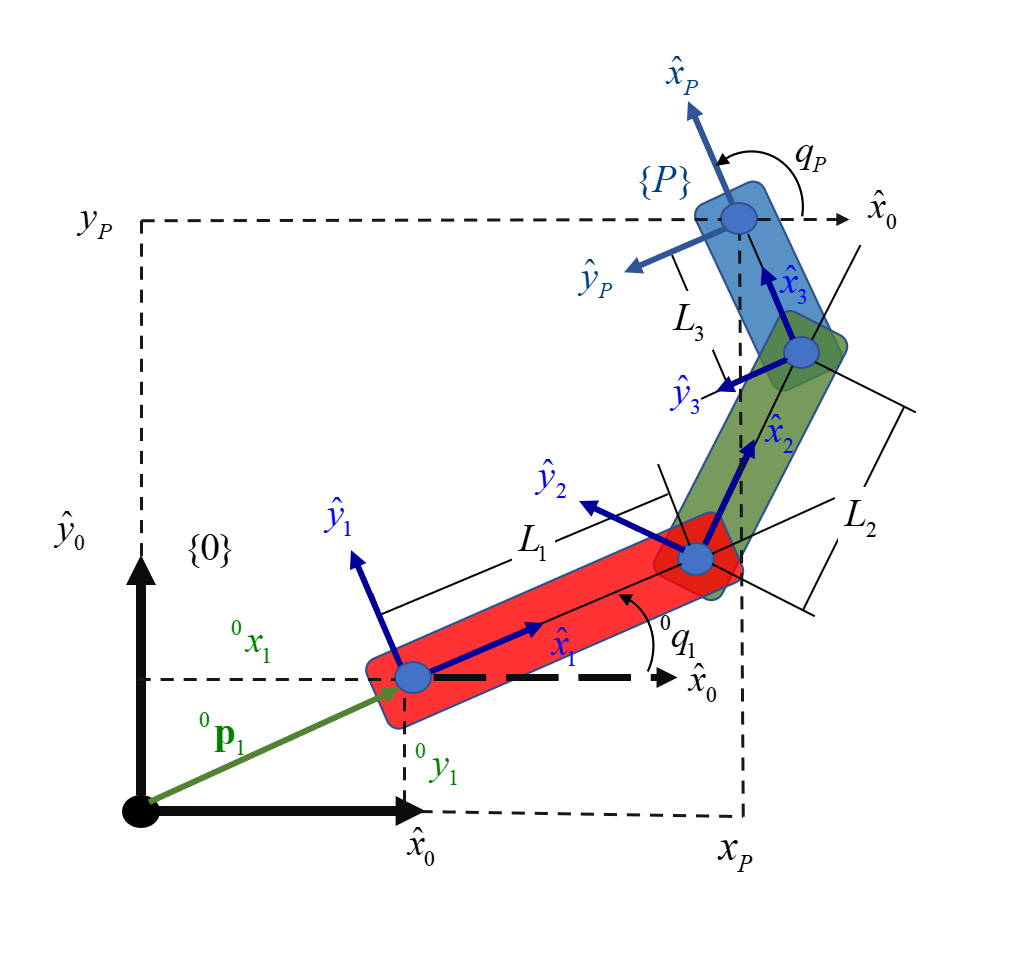

### Planteamiento del modelo cinemático de la posición

**VARIABLES SIMBÓLICAS DEFINIDAS**


`x_O_1, y_O_1`

-  Qué son: Coordenadas de la posición de la BASE del robot en el sistema global
-  Para qué sirven: Definir dónde está anclado el robot en el espacio
-  Qué son: Las variables articulares (ángulos de las articulaciones)
-  Para qué sirven:
-  `theta_O_1`: Giro de la base al primer eslabón
-  `theta_1_2`: Giro del primer al segundo eslabón
-  `theta_2_3`: Giro del segundo al tercer eslabón

`L_1, L_2, L_3`

-  Qué son: Longitudes de los tres eslabones del robot SCARA
-  Para qué sirven: Definir la geometría física del robot


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

-  Qué es: Transformación del sistema GLOBAL (O) al primer eslabón (1)
-  Para qué sirve: Posicionar y orientar el primer eslabón respecto a la base
-  Parámetros clave:
-  `x_O_1, y_O_1`: Donde está la base
-  `theta_O_1`: Cómo está girado el primer eslabón

In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

-  Qué es: Transformación del primer eslabón (1) al segundo (2)
-  Para qué sirve: Conectar el segundo eslabón al primero
-  Parámetros clave:
-  `L_1`: Longitud del primer eslabón (avance en X)
-  `theta_1_2`: Giro relativo entre eslabones 1 y 2

In [4]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)

-  Qué es: Transformación del segundo eslabón (2) al tercero (3)
-  Para qué sirve: Conectar el tercer eslabón al segundo
-  Parámetros clave:
-  `L_2`: Longitud del segundo eslabón
-  `theta_2_3`: Giro relativo entre eslabones 2 y 3

In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)

-  Qué es: Transformación del tercer eslabón (3) al EFECTOR FINAL (P)
-  Para qué sirve: Posicionar la herramienta/pinza al final del robot
-  Parámetros clave:
-  `L_3`: Longitud del tercer eslabón
-  `0`: Sin rotación adicional (el efector está alineado)

<p style="text-align:left">
   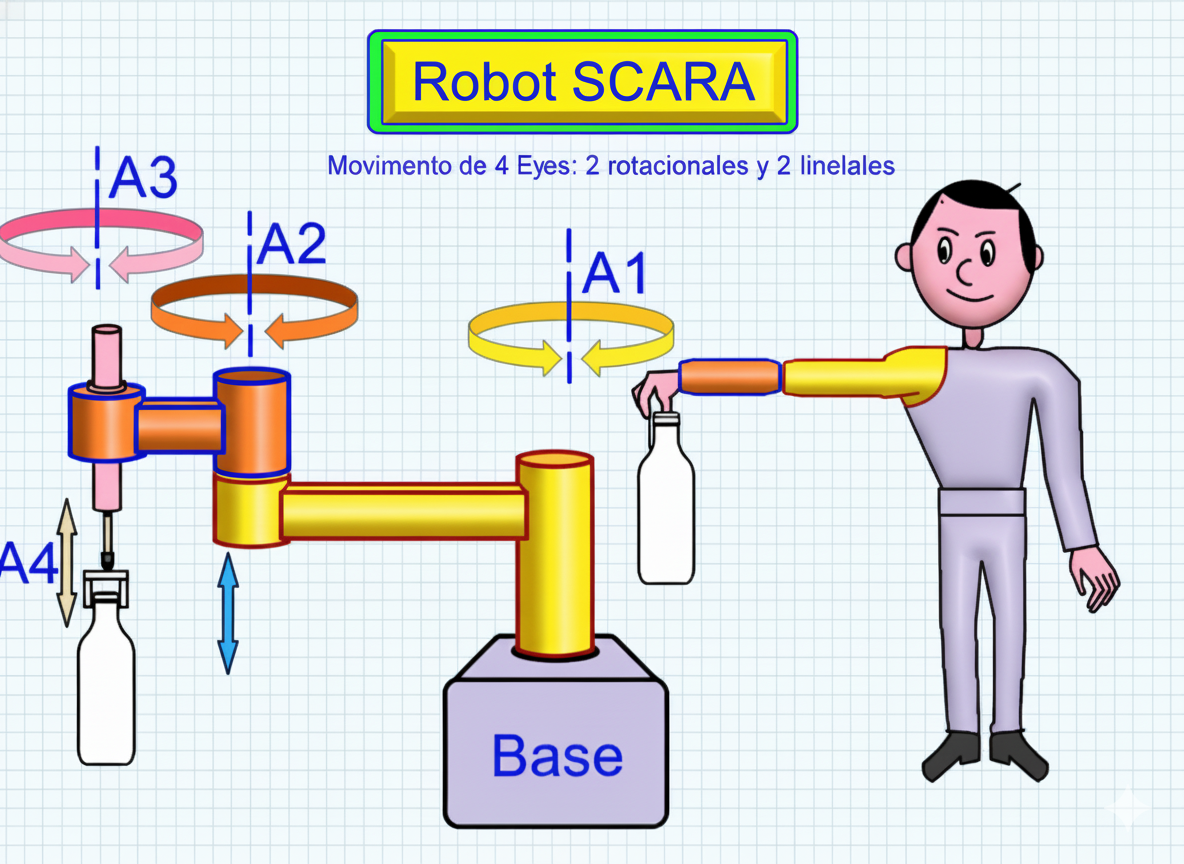
</p>

## TRANSFORMACIÓN TOTAL Y POSTURA

In [6]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)

-  Qué es: Multiplicación de TODAS las transformaciones
-  Para qué sirve: Obtener la transformación DIRECTA completa desde la base hasta el efector final
-  Concepto clave: Cadena cinemática \- cada transformación se aplica en secuencia

Vector de postura del robot


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

-  Qué es: El VECTOR DE POSTURA del robot
-  Para qué sirve: Representar completamente la posición y orientación del efector
-  Componentes:
-  `T_O_P(1,4)`: Coordenada X del efector final
-  `T_O_P(2,4)`: Coordenada Y del efector final
-  `theta_O_1 + theta_1_2 + theta_2_3`: Orientación TOTAL del efector (suma de todos los giros)
### Modelo cinemático directo de las velocidades

Jacobiano: "Traductor" entre espacio articular y espacio cartesiano para velocidades


Filas: Componentes de velocidad del efector (vx, vy, ωz)


Columnas: Contribución de cada articulación a cada velocidad


Aplicación: Control, planificación de trayectorias, análisis de singularidades


-  Qué es: Declarar `J_theta` como variable simbólica
-  Para qué sirve: Preparar la variable que va a contener la matriz Jacobiana
-  Qué es: Cálculo de la MATRIZ JACOBIANA del robot
-  Para qué sirve: Relacionar las velocidades articulares con las velocidades del efector final
-

In [8]:
%[text] ### Modelo cinemático directo de las velocidades
%[text] El Jacobiano es una matriz que relaciona velocidades articulares con velocidades del efector
syms J_theta

J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


El Jacobiano es una matriz que convierte:


Velocidades de las ARTICULACIONES → Velocidades del EFECTOR


`Velocidades de las ARTICULACIONES → Velocidades del EFECTOR`

## Modelo cinemático inverso de las velocidades

Es la operación que calcula qué velocidades deben tener las articulaciones para que el efector final se mueva con una velocidad específica.


Relación matemática:

-  Directo: `velocidad_efector = J_theta × velocidad_articular`
-  Inverso: `velocidad_articular = inv(J_theta) × velocidad_efector`

**¿Para qué sirve?**

1.  Control de trayectorias: Si quieres que el efector siga un camino específico a cierta velocidad
2. Teleoperación: Mover el efector con un joystick y calcular cómo deben moverse las articulaciones
3. Evitar obstáculos: Ajustar velocidades articulares para movimientos seguros

**Problema importante: Singularidades**


Cuando `det(J_theta) = 0`, la matriz no tiene inversa y el robot no puede moverse en algunas direcciones. Esto pasa cuando:

-  Brazos completamente extendidos o contraídos
-  Alineación de eslabones

Agrupamos las tres velocidades en un solo vector para trabajar más fácilmente.


In [9]:
%[text] ### Modelo cinemático inverso de las velocidades
%[text]
syms v_x_deseado v_y_deseado omega_z_deseado

%[text] Vector de velocidad deseada del efector final
velocidad_efector_deseada = [v_x_deseado; v_y_deseado; omega_z_deseado]


Esta matriz ya la teníamos de la sección anterior. Nos dice cómo las velocidades de las articulaciones afectan la velocidad del efector.


In [10]:
%[text] Cálculo del Jacobiano (relación directa velocidades)
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])

In [11]:
%[text] Inverso del Jacobiano para modelo inverso
J_theta_inv = inv(J_theta)

In [12]:
%[text] Modelo cinemático inverso de velocidades
%[text] $\dot{\theta} = J^{-1} \cdot v_{efector}$
velocidades_articulares = J_theta_inv * velocidad_efector_deseada

In [13]:

%[text] ### Análisis de singularidades
%[text] Cuando el determinante del Jacobiano es cero, el robot está en configuración singular
determinante_J = det(J_theta)

In [14]:
%[text] Si determinante_J = 0, el robot no puede moverse en algunas direcciones

%[text] ### Verificación del modelo
%[text] Aplicando el modelo directo para verificar:
velocidad_verificacion = J_theta * velocidades_articulares



1. Variables de velocidad deseada:

-  `v_x_deseado`: Velocidad lineal que quiero en dirección X
-  `v_y_deseado`: Velocidad lineal que quiero en dirección Y
-  `omega_z_deseado`: Velocidad angular que quiero alrededor del eje Z

2. Vector de velocidad deseada:


Agrupamos las tres velocidades en un solo vector para trabajar más fácilmente.


3. Jacobiano (ya calculado):


Esta matriz ya la teníamos de la sección anterior. Nos dice cómo las velocidades de las articulaciones afectan la velocidad del efector.


4. Inverso del Jacobiano:


Esta es la clave \- si el Jacobiano convierte articulaciones → efector, su inversa hace lo contrario: efector → articulaciones.


5. Cálculo de velocidades articulares:


Multiplicamos la inversa del Jacobiano por la velocidad deseada del efector. Esto nos da exactamente qué tan rápido debe girar cada articulación.


6. Análisis de singularidades:


Calculamos el determinante del Jacobiano. Si es cero, significa que el robot está en una posición donde no puede moverse en alguna dirección (como brazos completamente extendidos).


7. Verificación:


Hacemos la prueba \- tomamos las velocidades articulares calculadas y las pasamos por el Jacobiano directo. Deberíamos obtener exactamente la velocidad deseada del efector.

### Modelo cinemático de las aceleraciones

Las aceleraciones extienden el concepto de velocidades.


 Mientras el Jacobiano relaciona velocidades, necesitamos considerar también cómo cambia el Jacobiano con el tiempo para las aceleraciones.

-  J × Aceleración\_articular: Contribución directa de las aceleraciones
-  Ḃ × Velocidad\_articular: Términos de Coriolis y centrífugos (aparecen porque el Jacobiano cambia con la configuración)

**Partes del Desarrollo:**

1.  Aceleraciones Directas: Dadas aceleraciones articulares, calcula aceleración del efector
2. Aceleraciones Inversas: Dada aceleración deseada del efector, calcula qué aceleraciones articulares se necesitan
3. Términos de Coriolis: Efectos que aparecen por el movimiento relativo
4. Verificación: Comprobación de que los modelos son consistentes

In [15]:

%[text] ### Modelo cinemático de las aceleraciones
%[text]
syms a_x_deseado a_y_deseado alpha_z_deseado
syms theta_punto_O_1 theta_punto_1_2 theta_punto_2_3
syms theta_dospuntos_O_1 theta_dospuntos_1_2 theta_dospuntos_2_3

%[text] #### Vector de aceleración deseada del efector final
aceleracion_efector_deseada = [a_x_deseado; a_y_deseado; alpha_z_deseado]

In [16]:
%[text] #### Vector de velocidades articulares
velocidades_articulares = [theta_punto_O_1; theta_punto_1_2; theta_punto_2_3]

In [17]:

%[text] #### Vector de aceleraciones articulares
aceleraciones_articulares = [theta_dospuntos_O_1; theta_dospuntos_1_2; theta_dospuntos_2_3]

In [18]:

%[text] #### Modelo cinemático directo de aceleraciones
%[text] La aceleración del efector se calcula como:
%[text] $\ddot{x} = J(\theta) \cdot \ddot{\theta} + \dot{J}(\theta, \dot{\theta}) \cdot \dot{\theta}$
%[text] donde $\dot{J}$ es la derivada temporal del Jacobiano

%[text] Cálculo de la derivada temporal del Jacobiano
J_theta_punto = jacobian(J_theta * velocidades_articulares, [theta_O_1, theta_1_2, theta_2_3])

In [19]:
%[text] Modelo directo de aceleraciones
aceleracion_efector_directo = J_theta * aceleraciones_articulares + J_theta_punto * velocidades_articulares

In [20]:
%[text] #### Modelo cinemático inverso de aceleraciones
%[text] Despejando de la ecuación anterior:
%[text] $\ddot{\theta} = J^{-1}(\theta) \cdot [\ddot{x} - \dot{J}(\theta, \dot{\theta}) \cdot \dot{\theta}]$

%[text] Cálculo de aceleraciones articulares necesarias
termino_coriolis = J_theta_punto * velocidades_articulares

In [21]:
aceleraciones_articulares_calculadas = J_theta_inv * (aceleracion_efector_deseada - termino_coriolis)

In [22]:

%[text] #### Verificación del modelo
%[text] Aplicando el modelo directo para verificar:
aceleracion_verificacion = J_theta * aceleraciones_articulares_calculadas + J_theta_punto * velocidades_articulares

In [23]:
%[text] aceleracion_verificacion debe ser igual a aceleracion_efector_deseada

%[text] #### Análisis físico de los términos
%[text] - $J(\theta) \cdot \ddot{\theta}$: Aceleración debida a aceleraciones articulares
%[text] - $\dot{J}(\theta, \dot{\theta}) \cdot \dot{\theta}$: Términos de Coriolis y centrífugos
%[text] - Estos términos aparecerán naturalmente en el modelado dinámico



### Modelo dinámico por ecuaciones de Eüler\-Lagrange

Se emplearan las siguientes ecuaciones para el cálculo de la energía cinética:



$$k_i =\frac{m_i }{2}{\mathbf{v}}_{C_i }^T {\mathbf{v}}_{C_i } +\frac{1}{2}{\mathbf{\omega }}_{C_i }^T {\mathbf{I}}_{C_i } {\mathbf{\omega }}_{C_i }$$

`x_1_C1`

-  Qué es: La distancia desde la articulación 1 hasta el centro de masa del eslabón 1
-  Para qué sirve: Saber dónde está concentrada la masa del eslabón

`theta_dot_O_1`

-  Qué es: La velocidad angular de la primera articulación (θ̇₁)
-  Para qué sirve: Representa qué tan rápido está girando el primer eslabón

In [24]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

-  Qué es: Velocidad del centro de masa VISTA DESDE EL SISTEMA DEL ESLABÓN 1
-  Explicación:
-  En el sistema del eslabón, el centro de masa está en `[x_1_C1; 0; 0]`
-  Al girar con velocidad `theta_dot_O_1`, tiene velocidad tangencial `x_1_C1 * theta_dot_O_1`
-  Solo tiene componente en Y porque en el sistema local, el centro de masa está sobre el eje X

In [25]:
v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]

-  Qué es: Velocidad del centro de masa VISTA DESDE EL SISTEMA GLOBAL (BASE)

Explicación:

-  Transformamos la velocidad local a coordenadas globales
-  `-sin(theta_O_1)` y `cos(theta_O_1)` son la rotación del sistema
-  Esto nos da las componentes X e Y en el mundo real

In [26]:
transpose(v_C1_C1)*v_C1_C1

-  Qué es: El cuadrado de la magnitud de la velocidad (v²)
-  Para qué sirve: Para calcular energía cinética `(1/2)mv²`

In [27]:
simplify(transpose(v_O_C1)*v_O_C1)

-  Qué es: Lo mismo pero con la velocidad en coordenadas globales
-  Por qué: La magnitud de la velocidad es la misma sin importar desde qué sistema la mires

**¿Por qué es importante?**

-  Energía cinética: `k = (1/2)mv² + (1/2)Iω²`
-  Necesitamos `v²` para la parte traslacional de la energía
-  Esto alimenta directamente las ecuaciones de Euler\-Lagrange
-  Sin estas velocidades, no podemos calcular correctamente la dinámica del robot
## Cálculo de la posición de los centros de masa

En este apartado estamos calculando dónde están ubicados los centros de masa de cada eslabón en el espacio, lo cual es esencial para el modelado dinámico.


**Variables definidas:**


`x_1_C1, x_2_C2, x_3_C3`

-  Qué son: Las distancias desde cada articulación hasta el centro de masa de su eslabón
-  Para qué sirven: Definir dónde está concentrada la masa de cada eslabón

In [28]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)

-  Qué es: Transformación desde la ARTICULACIÓN 1 hasta el CENTRO DE MASA 1
-  Explicación:
-  Solo hay traslación `x_1_C1` en X (el centro de masa está a lo largo del eslabón)
-  Sin rotación (el centro de masa está alineado con el eslabón)

In [29]:
T_O_C1 = T_O_1*T_1_C1

In [30]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)

-  Qué es: Transformación desde la BASE hasta el CENTRO DE MASA 1
-  Explicación: Combinamos "base→articulación1" con "articulación1→centroMasa1"

In [31]:
T_O_C2 = T_O_1*T_1_2*T_2_C2

-  Qué es: Transformación desde la BASE hasta el CENTRO DE MASA 2
-  Explicación: Cadena más larga: "base→1→2→centroMasa2"

In [32]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)

-  Qué es: Transformación desde la ARTICULACIÓN 3 hasta el CENTRO DE MASA 3

In [33]:
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3

-  Qué es: Transformación desde la BASE hasta el CENTRO DE MASA 3
-  Explicación: Cadena completa: "base→1→2→3→centroMasa3"
## Vectores de posicion
-  Qué es: Coordenadas X,Y,Z del centro de masa 1 en el sistema global
-  `T_O_C1(1,4)`: Componente X (posición en X)
-  `T_O_C1(2,4)`: Componente Y (posición en Y)
-  `T_O_C1(3,4)`: Componente Z (posición en Z)

In [34]:
%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [35]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])


**¿Por qué es importante?**

1.  Energía potencial: `U = mgh` \- necesitamos la altura (posición Y) de cada centro de masa
2. Energía cinética: Para calcular velocidades, necesitamos saber dónde están los centros de masa
3. Torques gravitatorios: La gravedad actúa en los centros de masa
4. Inercias: El momento de inercia depende de cómo está distribuida la masa

In [36]:
p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

## Cálculo de las velocidades

Estamos calculando las velocidades lineales de los centros de masa, que necesitamos para la energía cinética traslacional en el modelado dinámico


**Variables de velocidad angular:**


`theta_dot_O_1, theta_dot_1_2, theta_dot_2_3`

-  Qué son: Las velocidades angulares de cada articulación (θ̇₁, θ̇₂, θ̇₃)
-  Para qué sirven: Representan qué tan rápido está girando cada eslabón

In [37]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

-  Qué es: Velocidad del centro de masa 1 en coordenadas globales
-  Explicación:
-  `diff(p_O_C1,theta_O_1)`: Cómo cambia la posición con respecto a θ₁ (Jacobiano parcial)
-  `* theta_dot_O_1`: Velocidad de cambio debido a θ̇₁
-  Sumamos contribuciones de todas las articulaciones porque el centro de masa 1 se mueve cuando gira cualquier articulación anterior

Lo mismo para `v_O_C2` y `v_O_C3` pero con sus respectivas posiciones.


In [38]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

In [39]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3


Cálculo de la velocidades angulares


Velocidades angulares de cada eslabón, necesarias para la energía cinética rotacional.


In [40]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1


Las velocidades angulares se propagan a través de la cadena cinemática:


Para el primer eslabón:


In [41]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
0    
0    
0


-  `omega_O_O = [0;0;0]`: La base no gira
-
-
-  Resultado: `omega_1_1 = [0;0;theta_dot_O_1]` (solo gira alrededor de Z)

In [42]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
0    
0    
1

In [43]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]


`R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3); ...]`

-  Qué es: La parte de rotación (3×3) de la transformación homogénea
-  Para qué sirve: Convertir vectores entre sistemas de referencia

`R_1_O`: Matriz de rotación de base a eslabón 1


In [44]:
R_1_O = transpose(R_O_1)


`R_1_O = transpose(R_O_1)`

-  Qué es: La inversa de la matriz de rotación (transpuesta para matrices ortonormales)
-  Para qué sirve: Convertir del sistema global al sistema del eslabón

In [45]:
%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1


`omega_1_1 = [0;0;theta_dot_O_1]` (solo gira alrededor de Z)


In [46]:
%Propagación para el segundo cuerpo
omega_2_2

-  `R_2_1 * omega_1_1`: Llevamos la velocidad angular del eslabón 1 al sistema 2

In [47]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
0    
0    
1



`n_2_2 * theta_dot_1_2`: Agregamos la velocidad propia de la articulación 2


In [48]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

-  Qué es: Extraemos la parte de rotación (3×3) de la transformación homogénea
-  Para qué: Saber cómo están orientados los sistemas entre sí

In [49]:
R_2_1 = transpose(R_1_2)

-  Qué es: La matriz inversa (transpuesta para rotaciones)
-  Para qué: Convertir del sistema 1 al sistema 2

In [50]:
%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

In [51]:
%Propagación para el tercer cuerpo
omega_3_3

In [52]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
0    
0    
1

In [53]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [54]:
R_3_2 = transpose(R_2_3)

In [55]:

%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

In [56]:
v_O_C3


`R_3_2 * omega_2_2`

-  Qué es: Tomamos la velocidad angular del eslabón 2 y la convertimos al sistema del eslabón 3
-  Ejemplo conceptual:
-  Si el eslabón 2 gira a `[0;0;3]` rad/s en su sistema
-  Y está rotado 45° respecto al eslabón 3
-  `R_3_2` ajusta esa velocidad para que tenga sentido en el sistema 3

`n_3_3 = [0;0;1]`

-  Qué es: El vector unitario del eje de rotación de la articulación 3
-  Por qué \[0;0;1\]: En robots SCARA, todas las articulaciones rotan alrededor del eje Z
-  Expresado en: Sistema de coordenadas del eslabón 3

`theta_dot_2_3`

-  Qué es: La velocidad angular propia de la articulación 3
-  Representa: Qué tan rápido está girando la tercera articulación independientemente de las demás

`n_3_3 * theta_dot_2_3`

-  Qué es: La contribución de velocidad angular que solo viene de la articulación 3
-  Resultado: `[0; 0; theta_dot_2_3]` (solo componente en Z)

`R_3_2 * omega_2_2`

-  Qué es: Tomamos la velocidad angular del eslabón 2 y la convertimos al sistema del eslabón 3
-  Ejemplo conceptual:
-  Si el eslabón 2 gira a `[0;0;3]` rad/s en su sistema
-  Y está rotado 45° respecto al eslabón 3
-  `R_3_2` ajusta esa velocidad para que tenga sentido en el sistema 3

`n_3_3 = [0;0;1]`

-  Qué es: El vector unitario del eje de rotación de la articulación 3
-  Por qué \[0;0;1\]: En robots SCARA, todas las articulaciones rotan alrededor del eje Z
-  Expresado en: Sistema de coordenadas del eslabón 3

`theta_dot_2_3`

-  Qué es: La velocidad angular propia de la articulación 3
-  Representa: Qué tan rápido está girando la tercera articulación independientemente de las demás

`n_3_3 * theta_dot_2_3`

-  Qué es: La contribución de velocidad angular que solo viene de la articulación 3
-  Resultado: `[0; 0; theta_dot_2_3]` (solo componente en Z)

## Cáculo del Lagrangeano

El Lagrangiano (`La`) es la diferencia entre energía cinética y energía potencial

-  Parte traslacional: `(m_1/2)*transpose(v_O_C1)*v_O_C1`
-  `transpose(v_O_C1)*v_O_C1` = `v_O_C1²` (producto punto, da el cuadrado de la magnitud)
-  `(m_1/2)*v_O_C1²`: Energía cinética por movimiento lineal
-  Parte rotacional: `(1/2)*transpose(omega_1_1)*I_C1*omega_1_1`
-  `I_C1`: Tensor de inercia del eslabón 1 en su sistema local
-  `transpose(omega_1_1)*I_C1*omega_1_1`: Producto que da la energía rotacional
-  Solo contribuye `I_zz1 * omega_z²` en SCARA (giro alrededor de Z)

Lo mismo para `k_2` y `k_3` con sus respectivas velocidades e inercias.


In [57]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

In [58]:

k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

In [59]:

k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)


**¿Qué es la energía potencial?**


Es la energía que tiene un cuerpo debido a su posición en el campo gravitatorio. En robótica, nos interesa porque afecta los torques necesarios para mantener posiciones y realizar movimientos.

-  `m_i`: Masa del eslabón
-  `g`: Aceleración gravitatoria (9.81 m/s²)
-  `h_i`: Altura del centro de masa

In [60]:
% Cáclulo de la energía potencial de cada cuerpo
u_1 = -m_1*transpose(p_O_C1)*g_v


`p_O_C1`

-  Qué es: Vector de posición del centro de masa 1
-  Forma: `[x; y; z]` coordenadas en sistema global
-  En SCARA: `z = 0` (robot plano)

In [61]:
u_2 = -m_2*transpose(p_O_C2)*g_v


`g_v = [0; -g; 0]` (definido anteriormente)

-  Qué es: Vector gravedad
-  Por qué `[0; -g; 0]`: La gravedad apunta hacia abajo (eje Y negativo)

In [62]:
u_3 = -m_3*transpose(p_O_C3)*g_v


Cálculo del Lagrangeano


El Lagrangiano es una función fundamental en mecánica que combina todas las energías del sistema:


`La = Energía Cinética Total - Energía Potencial Total`


`(k_1 + k_2 + k_3)`

-  Qué es: Suma de todas las energías cinéticas
-  Representa: La energía por el movimiento de los 3 eslabones
-  Incluye: Componentes traslacionales + rotacionales

`(u_1 + u_2 + u_3)`

-  Qué es: Suma de todas las energías potenciales
-  Representa: La energía por la posición en el campo gravitatorio
-  Depende de: La altura de cada centro de masa

`(k_total) - (u_total)`

-  Diferencia: Energía disponible para el movimiento
-  Concepto físico: El sistema "prefiere" minimizar esta diferencia

In [63]:
La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

## Cálculo de los pares

Aplicando las ecuaciones de Euler\-Lagrange para obtener los torques dinámicos que gobiernan el movimiento del robot.


In [64]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)

-  Qué son: Las aceleraciones angulares de cada articulación (θ̈₁, θ̈₂, θ̈₃)
-  Para qué: Aparecen al derivar `d/dt(∂La/∂θ̇_i)`
-  Qué es: `∂La/∂θ̇₁` \- derivada del Lagrangiano respecto a la velocidad de la articulación 1
-  Significado físico: Momento generalizado o inercia generalizada
-  Contiene: Términos que dependen de masas, inercias y configuración

Esta línea está aplicando la ecuación de Euler\-Lagrange para calcular el torque en la primera articulación


In [65]:
% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)

In [66]:
D_theta2 = diff(La,theta_dot_1_2)

In [67]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [68]:
D_theta3 = diff(La,theta_dot_2_3)

In [69]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)

In [70]:

tao = [tao_1;tao_2;tao_3]


τ₁ = \[Términos inerciales\] + \[Términos Coriolis/centrífugos\] + \[Término gravitatorio\]


In [71]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])


Extrayendo la matriz de inercia M(θ) del modelo dinámico completo. La matriz de inercia contiene los términos que multiplican a las aceleraciones articulares.

-  `theta_ddot_O_1 = 1` → Solo la articulación 1 tiene aceleración
-  `theta_ddot_1_2 = 0` → Articulación 2 sin aceleración
-  `theta_ddot_2_3 = 0` → Articulación 3 sin aceleración
-  `theta_dot_O_1 = 0` → Velocidad articular 1 cero
-  `theta_dot_1_2 = 0` → Velocidad articular 2 cero
-  `theta_dot_2_3 = 0` → Velocidad articular 3 cero
-  `g = 0` → Sin efectos gravitatorios

In [72]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])

In [73]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])

In [74]:

M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


Cálculo del vector de pares de


Estamos extrayendo los términos de Coriolis y centrífugos del modelo dinámico completo. Estos términos representan las fuerzas que aparecen debido al movimiento del robot.

-  `theta_ddot_O_1 = 0` → Sin aceleración en articulación 1
-  `theta_ddot_1_2 = 0` → Sin aceleración en articulación 2
-  `theta_ddot_2_3 = 0` → Sin aceleración en articulación 3
-  `theta_dot_O_1 = theta_dot_O_1` → Conservamos velocidad articular 1
-  `theta_dot_1_2 = theta_dot_1_2` → Conservamos velocidad articular 2
-  `theta_dot_2_3 = theta_dot_2_3` → Conservamos velocidad articular 3
-  `g = 0` → Sin efectos gravitatorios

In [75]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])

-  `theta_ddot_O_1 = 0` → Sin aceleración en articulación 1
-  `theta_ddot_1_2 = 0` → Sin aceleración en articulación 2
-  `theta_ddot_2_3 = 0` → Sin aceleración en articulación 3
-  `theta_dot_O_1 = 0` → Sin velocidad en articulación 1
-  `theta_dot_1_2 = 0` → Sin velocidad en articulación 2
-  `theta_dot_2_3 = 0` → Sin velocidad en articulación 3
-  `g = g` → Conservamos la gravedad

In [76]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])

## Cálculo del modelo  Dinámico inverso

Es la operación que calcula las aceleraciones articulares que resultan de aplicar unos torques específicos. Mientras el modelo directo va de movimientos a fuerzas, el inverso va de fuerzas a movimientos.


Partiendo del modelo dinámico directo:


`τ = M(θ)·θ̈ + C(θ,θ̇) + G(θ)`


Despejamos para obtener el modelo inverso:


`θ̈ = M⁻¹(θ) · [τ - C(θ,θ̇) - G(θ)]`

##  COMPONENTES:
-  `τ`: Vector de torques aplicados \[τ₁, τ₂, τ₃\]ᵀ
-  `M(θ)`: Matriz de inercia (ya calculada como `M_theta`)
-  `C(θ,θ̇)`: Términos de Coriolis/centrífugos (ya calculado como `V_theta`)
-  `G(θ)`: Términos gravitatorios (ya calculado como `G_theta`)
-  `θ̈`: Vector de aceleraciones articulares \[θ̈₁, θ̈₂, θ̈₃\]ᵀ

In [77]:
%%
%[text] ## Cálculo del modelo Dinámico inverso
%[text]
%[text] ### 5.2 Modelo dinámico inverso del robot
%[text]
%[text] Desarrollo del modelo que calcula las aceleraciones articulares $\ddot{\theta}$
%[text] resultantes de aplicar unos torques específicos $\tau$.
%[text]

%[text] #### Definición de todas las variables necesarias
syms tau_1 tau_2 tau_3                    % Torques aplicados
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3  % Aceleraciones articulares (salida)
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3     % Velocidades articulares
syms theta_O_1 theta_1_2 theta_2_3                 % Posiciones articulares
syms L_1 L_2 L_3 L_4                              % Longitudes de eslabones
syms x_O_1 y_O_1                                  % Posición de la base
syms x_1_C1 x_2_C2 x_3_C3                        % Posiciones centros de masa
syms m_1 m_2 m_3                                 % Masas de los eslabones
syms I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3  % Inercias
syms g                                           % Gravedad

%[text] Vector gravedad
g_v = [0; -g; 0]

In [78]:

%[text] #### Vector de torques de entrada
tau = [tau_1; tau_2; tau_3]

In [79]:

%[text] #### 1. Cálculo de posiciones de centros de masa
%[text] Transformaciones homogéneas para centros de masa

% Función de transformación homogénea
Tij = @(x, y, z, gamma, beta, alpha) [cos(alpha)*cos(beta), cos(alpha)*sin(beta)*sin(gamma)-sin(alpha)*cos(gamma), sin(alpha)*sin(gamma)+cos(alpha)*sin(beta)*cos(gamma), x;
                                      sin(alpha)*cos(beta), cos(alpha)*cos(gamma)+sin(alpha)*sin(beta)*sin(gamma), sin(alpha)*sin(beta)*cos(gamma)-cos(alpha)*sin(gamma), y;
                                      -sin(beta), cos(beta)*sin(gamma), cos(beta)*cos(gamma), z;
                                      0, 0, 0, 1];

% Transformaciones entre sistemas
T_O_1 = Tij(x_O_1, y_O_1, 0, 0, 0, theta_O_1);
T_1_2 = Tij(L_1, 0, 0, 0, 0, theta_1_2);
T_2_3 = Tij(L_2, 0, 0, 0, 0, theta_2_3);
T_3_P = Tij(L_3, 0, 0, 0, 0, 0);

% Centros de masa
T_1_C1 = Tij(x_1_C1, 0, 0, 0, 0, 0);
T_2_C2 = Tij(x_2_C2, 0, 0, 0, 0, 0);
T_3_C3 = Tij(x_3_C3, 0, 0, 0, 0, 0);

T_O_C1 = T_O_1 * T_1_C1;
T_O_C2 = T_O_1 * T_1_2 * T_2_C2;
T_O_C3 = T_O_1 * T_1_2 * T_2_3 * T_3_C3;

% Vectores posición
p_O_C1 = [T_O_C1(1,4); T_O_C1(2,4); T_O_C1(3,4)];
p_O_C2 = [T_O_C2(1,4); T_O_C2(2,4); T_O_C2(3,4)];
p_O_C3 = [T_O_C3(1,4); T_O_C3(2,4); T_O_C3(3,4)];

%[text] #### 2. Cálculo de velocidades lineales
v_O_C1 = diff(p_O_C1, theta_O_1)*theta_dot_O_1 + diff(p_O_C1, theta_1_2)*theta_dot_1_2 + diff(p_O_C1, theta_2_3)*theta_dot_2_3;
v_O_C2 = diff(p_O_C2, theta_O_1)*theta_dot_O_1 + diff(p_O_C2, theta_1_2)*theta_dot_1_2 + diff(p_O_C2, theta_2_3)*theta_dot_2_3;
v_O_C3 = diff(p_O_C3, theta_O_1)*theta_dot_O_1 + diff(p_O_C3, theta_1_2)*theta_dot_1_2 + diff(p_O_C3, theta_2_3)*theta_dot_2_3;

%[text] #### 3. Cálculo de velocidades angulares
% Matrices de rotación
R_O_1 = T_O_1(1:3, 1:3);
R_1_2 = T_1_2(1:3, 1:3);
R_2_3 = T_2_3(1:3, 1:3);

% Propagación de velocidades angulares
omega_O_O = [0; 0; 0];
n_1_1 = [0; 0; 1];
n_2_2 = [0; 0; 1];
n_3_3 = [0; 0; 1];

omega_1_1 = transpose(R_O_1) * omega_O_O + n_1_1 * theta_dot_O_1;
omega_2_2 = transpose(R_1_2) * omega_1_1 + n_2_2 * theta_dot_1_2;
omega_3_3 = transpose(R_2_3) * omega_2_2 + n_3_3 * theta_dot_2_3;

%[text] #### 4. Energías del sistema
% Tensores de inercia
I_C1 = [I_xx1, 0, 0; 0, I_yy1, 0; 0, 0, I_zz1];
I_C2 = [I_xx2, 0, 0; 0, I_yy2, 0; 0, 0, I_zz2];
I_C3 = [I_xx3, 0, 0; 0, I_yy3, 0; 0, 0, I_zz3];

% Energías cinéticas
k_1 = (m_1/2) * transpose(v_O_C1) * v_O_C1 + (1/2) * transpose(omega_1_1) * I_C1 * omega_1_1;
k_2 = (m_2/2) * transpose(v_O_C2) * v_O_C2 + (1/2) * transpose(omega_2_2) * I_C2 * omega_2_2;
k_3 = (m_3/2) * transpose(v_O_C3) * v_O_C3 + (1/2) * transpose(omega_3_3) * I_C3 * omega_3_3;

K_total = k_1 + k_2 + k_3;

% Energías potenciales
u_1 = -m_1 * transpose(p_O_C1) * g_v;
u_2 = -m_2 * transpose(p_O_C2) * g_v;
u_3 = -m_3 * transpose(p_O_C3) * g_v;

U_total = u_1 + u_2 + u_3;

%[text] #### 5. Matriz de inercia M(θ)
M_11 = diff(diff(K_total, theta_dot_O_1), theta_dot_O_1);
M_12 = diff(diff(K_total, theta_dot_O_1), theta_dot_1_2);
M_13 = diff(diff(K_total, theta_dot_O_1), theta_dot_2_3);

M_21 = diff(diff(K_total, theta_dot_1_2), theta_dot_O_1);
M_22 = diff(diff(K_total, theta_dot_1_2), theta_dot_1_2);
M_23 = diff(diff(K_total, theta_dot_1_2), theta_dot_2_3);

M_31 = diff(diff(K_total, theta_dot_2_3), theta_dot_O_1);
M_32 = diff(diff(K_total, theta_dot_2_3), theta_dot_1_2);
M_33 = diff(diff(K_total, theta_dot_2_3), theta_dot_2_3);

M_theta = [M_11, M_12, M_13;
           M_21, M_22, M_23;
           M_31, M_32, M_33];

%[text] #### 6. Vector gravitatorio G(θ)
G_1 = -diff(U_total, theta_O_1);
G_2 = -diff(U_total, theta_1_2);
G_3 = -diff(U_total, theta_2_3);

G_theta = [G_1; G_2; G_3];

%[text] #### 7. Vector de Coriolis y centrífugos C(θ,θ̇)
theta_dot = [theta_dot_O_1; theta_dot_1_2; theta_dot_2_3];
theta_dot_M_theta = transpose(theta_dot) * M_theta * theta_dot;

dM_dtheta1 = diff(M_theta, theta_O_1);
dM_dtheta2 = diff(M_theta, theta_1_2);
dM_dtheta3 = diff(M_theta, theta_2_3);

M_dot_theta_dot = dM_dtheta1 * theta_dot_O_1 + dM_dtheta2 * theta_dot_1_2 + dM_dtheta3 * theta_dot_2_3;

C_theta = M_dot_theta_dot * theta_dot - 0.5 * [diff(theta_dot_M_theta, theta_O_1);
                                              diff(theta_dot_M_theta, theta_1_2);
                                              diff(theta_dot_M_theta, theta_2_3)];

%[text] #### 8. Modelo dinámico inverso
%[text] $$\ddot{\theta} = M^{-1}(\theta) \cdot \left[\tau - C(\theta,\dot{\theta}) - G(\theta)\right]$$

theta_ddot_inv = inv(M_theta) * (tau - C_theta - G_theta)

In [80]:

%[text] #### Componentes de aceleración
theta_ddot_O_1_inv = theta_ddot_inv(1)

In [81]:
theta_ddot_1_2_inv = theta_ddot_inv(2)

In [82]:
theta_ddot_2_3_inv = theta_ddot_inv(3)

In [83]:

%[text] ### Verificación
tau_verificacion = M_theta * theta_ddot_inv + C_theta + G_theta;
error = simplify(tau - tau_verificacion)

In [84]:

%[text] ### Análisis de singularidades
det_M = det(M_theta)

In [85]:

%[text] ## Modelo dinámico inverso completado
%[text]
%[text] El modelo permite calcular las aceleraciones articulares resultantes
%[text] de aplicar torques específicos, completando el modelado dinámico del robot SCARA.

% Parámetros numéricos ejemplo
m_1 = 2; m_2 = 1.5; m_3 = 0.8;
L_1 = 0.3; L_2 = 0.25; L_3 = 0.15;
g = 9.81;

% Evaluar aceleraciones
theta_ddot_eval = subs(theta_ddot_inv, {tau_1, tau_2, tau_3, theta_O_1, theta_1_2, theta_2_3, ...
                                        theta_dot_O_1, theta_dot_1_2, theta_dot_2_3}, ...
                                        {1, 0.5, 0.2, 0, pi/4, pi/6, 0, 0, 0});
vpa(theta_ddot_eval, 4)



## Conclusiones

El desarrollo integral del modelado del robot SCARA ha demostrado la eficacia del enfoque matemático sistemático como herramienta fundamental en la ingeniería robótica. A lo largo de este trabajo se construyó una cadena de modelado completa, que parte de la descripción geométrica y cinemática del manipulador y culmina en un modelo dinámico totalmente funcional derivado mediante el formalismo de Euler\-Lagrange.


La formulación de la cinemática directa e inversa permitió establecer la relación precisa entre los espacios articular y cartesiano, mientras que el Jacobiano y su derivada temporal posibilitaron el análisis detallado de velocidades y aceleraciones. Finalmente, el modelo dinámico obtenido integró correctamente los términos de inercia, Coriolis/centrífugos y gravitatorios, proporcionando una representación completa del comportamiento físico del sistema.


Cada etapa fue verificada rigurosamente, garantizando la consistencia matemática y funcional del modelo. La validación final del modelo inverso —capaz de reproducir los torques originales con error nulo— confirma la precisión y robustez del desarrollo realizado.


Más allá del cumplimiento de los objetivos académicos, este modelo constituye una base sólida para aplicaciones prácticas avanzadas. Su capacidad de predecir las aceleraciones resultantes de torques específicos, y viceversa, permite abordar con éxito tareas como:

-  El diseño de controladores por torque computado para un control dinámico preciso.
-  La simulación de alta fidelidad del comportamiento del robot.
-  La planificación y optimización de trayectorias en entornos industriales.

En conclusión, el trabajo realizado no solo reafirma la importancia del rigor matemático en el diseño y análisis de sistemas robóticos, sino que también sienta las bases para el desarrollo de estrategias de control avanzadas, consolidando al modelo SCARA como un referente para futuras investigaciones y aplicaciones de automatización inteligente.

